# KNN (K nearest neighbour)

- knn is like a asking your neigbor for advaice
- if most of your near by neighbours are wearing jackets its  probably cold outside
- if your near people who passed exam chances are  you will too
  

####  KNN predicts based on 

- the "K" closest neighbour
- majority votes for classification
- avg values for Regression 

| neighbour | height (cm)| Weight (kg)| play basket ball ?|
|------------|------------|------------|-------------------|
| A | 180 | 75 | yes|
| B| 175 | 70| YES|
| C | 160 | 60 | NO |

-  U R 178 CM tall, 73 kg weight
-  ask k = 3 neighbours
-  two say yes once say no
-  so KNN predicts you probably play basket ball.  

# benefits of KNN

- simple 
- no training time 
- works for classification and  regression

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

In [12]:
data = load_iris()
df = pd.DataFrame(data.data,columns = data.feature_names)
df["species"] = data.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [13]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


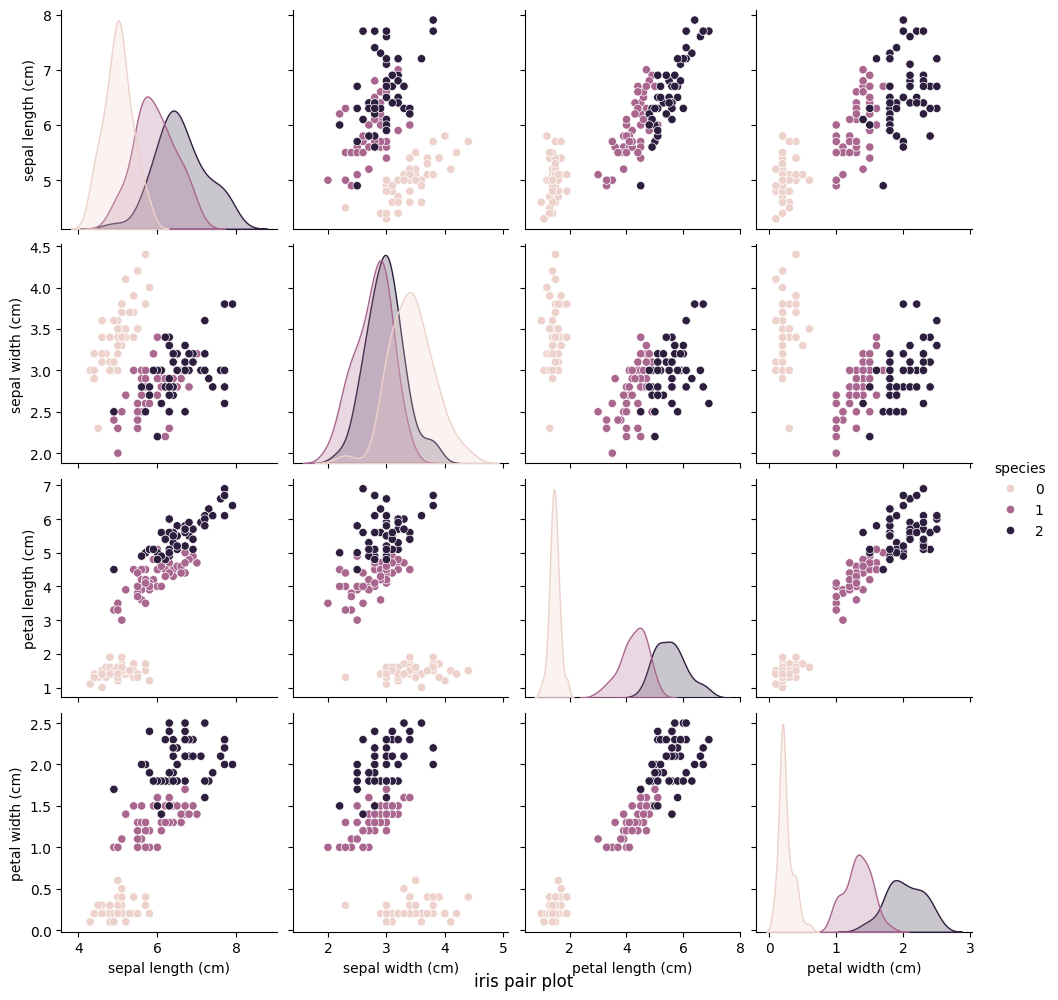

In [14]:
sns.pairplot(df,hue="species",diag_kind = "kde")
plt.suptitle("iris pair plot",y=0.02)
plt.show()

In [16]:
X = df.drop("species",axis = 1)
y = df["species"]

In [17]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64


In [18]:
print(X)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.8,random_state = 42)

In [38]:
KNN = KNeighborsClassifier(n_neighbors = 5)
KNN.fit(X_train,y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [39]:
y_pred = KNN.predict(X_test)
print("accuracy:",accuracy_score(y_test,y_pred))

accuracy: 0.9666666666666667


In [22]:
print("classification report :\n",classification_report(y_test,y_pred))

classification report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [23]:
print("confusion_matrix:\n",confusion_matrix(y_test,y_pred))

confusion_matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


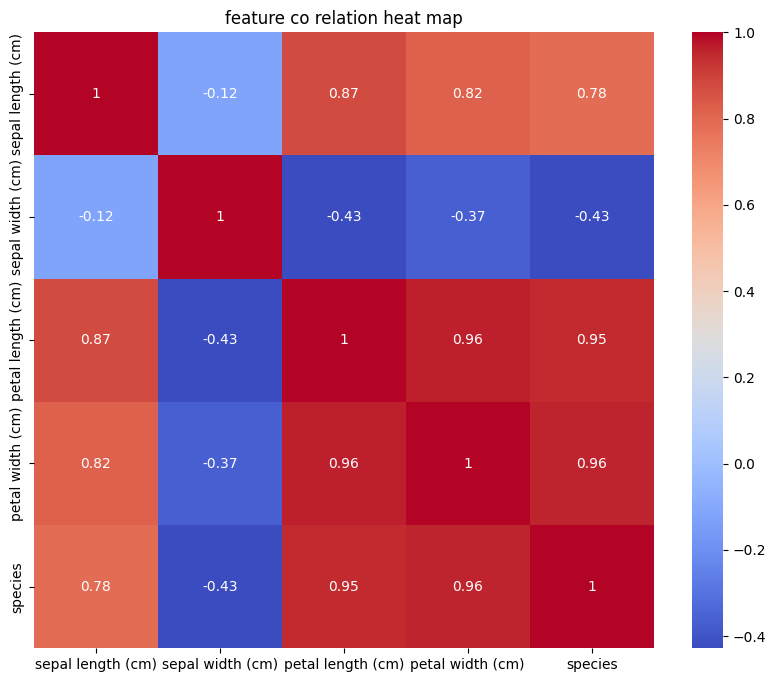

In [25]:
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include = "number").corr(), annot=True, cmap="coolwarm")
plt.title('feature co relation heat map')
plt.show()